In [2]:
import matplotlib.pyplot as plt

# Numerical Methods for Ordinary Differential Equations and Partial Differential Equations

## Topics

* I. Introduction
    * Cauchy-Lipschitz (Picard-Lindelof) Theorem    
    
* II. Examples in Finance
    * Black-Scholes Equation
    * Affine Term-structure model
    
* III. Numerical Methods
    * Finite Difference Methods
    * The Euler's Methods
    * Consistency, Stability and Convergence
    * The Backward Euler's Methods
    * The Crank-Nicholson Method
    * The Runge-Kutta Method
    
* IV. Numerical Examples in Python

* V. Introduction to PDE in Finance

# References

* [Finite Difference Methods in Financial Engineering: A Partial Differential Equation Approach, Daniel J. Duffie](https://www.amazon.com/Finite-Difference-Methods-Financial-Engineering/dp/0470858826)
* J. Stoer and R. Bulirsch, Chapter 7 of Introduction to Numerical Analysis, Second Edition, Springer, 1993.
* J. Guyon and P. Henry-Labordere, Nonlinear Option Pricing, Chapman \& hall/CRC, 2014.
* A. Cartea, S. Jaimungal and J. Penalva, Algorithmic and High-Frequency Trading, Cambridge University Press, 2018.

# I. Introduction


* The initial value problem (IVP) of a general **first** order ordinary differential equation (ODE) 

$$
y' = f(t,y), \;\; y(t_0) = y_0
$$

* The integral formulation

$$
y(t) = y_0 + \int_{t_0}^t f(s,y(s)) \; ds
$$

* If $f(t,y)$ is independent of $y$, solving the ODE is simply an integration. 

* In general, the integral equation is not any easier to solve.

* If $f(t,y)$ is independent of $t$, the ODE is said to be **autonomous**






* If $y$ and $f$ are vectors, this becomes a system of first order ODEs

$$
\renewcommand{bs}{\boldsymbol}
\renewcommand{by}{\boldsymbol{y}}
\renewcommand{bf}{\boldsymbol{f}}
\by' = \bf(t, \by), \;\; \by(t_0) = \by_0
$$

* General $n^{th}$ order ODE

$$
y^{(n)}(t) = f(t,y(t),y'(t), \cdots, y^{(n-1)}(t))
$$

* Can be converted into a system of first order ODEs

$$
\bs{z}' = \bs{g}(t, \bs{z})
$$

$\hspace{0.3in}$ where 

$$
\begin{matrix}
\bs{z} =  \left[
\begin{matrix}
y(t) \\
y'(t) \\
\vdots \\
y^{(n-1)}(t) 
\end{matrix}
\right], \;\; \mbox{and} \;\;
\end{matrix}
\begin{matrix}
\bs{g}(t, \bs{z}) =  \left[
\begin{matrix}
y'(t) \\
y''(t) \\
\vdots \\
y^{(n-1)}(t) \\
f(t,y(t),y'(t), \cdots, y^{(n-1)}(t))
\end{matrix}
\right]
\end{matrix}
$$



## Cauchy-Lipschitz Theorem

Also called [Picard-Lindelof](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem) theorem or Picard's existence theorem, or existence and uniqueness theorem.

* Interesting things one want to know about the IVP of the general first order systems of ODE:

    * 1) Is there a solution?

    * 2) Is the solution unique?

    * 3) Is the solution sensitive to the data?

    * 4) How to solve for the solution?
    

* **Picard's theorem**:
If $f(t,y)$ is **Lipschitz continuous** in $y$ in a neighborhood of $(t_0, y(t_0))$, then the IVP of the ODE has a unique solution in the neighborhood.

In particular, if $f$ is $\mathcal{C}^1$, then the theorem is applicable.


# II. Examples in Finance

### **Black-Scholes** equation

$$
C_t = \frac{1}{2}\sigma^2S^2C_{SS} + rSC_S - rC
$$

Define the Laplace transform of option price function $C(t,S)$ as

$$
\renewcommand{hC}{\hat{C}}
\hC(z,S) := \mathcal{L}[C](z) = \int_{0}^{\infty}C(t,S)e^{-zt} \; dt
$$

Taking the Laplace transform of the Black-Scholes equation,

$$
z\hC = \frac{1}{2}\sigma^2S^2 \hC_{SS} + rS \hC_S - r \hC + C_0
$$

Here $C_0$ is the time reversed payoff condition (*).

So one way to solve Black-Scholes is to solve an ODE and then invert the Laplace Transform.




### Affine Term Structure model

Assume the short rate is affine under the risk-neutral measure

$$
dr_t = \kappa(\theta-r_t)dt + \sqrt{\sigma_1 +\sigma_2 r_t}\;dW_t
$$

Then bond prices $P(t,T) = P(t,r_t) = E_t\left[e^{-\int_t^T r_u du}\right]$ are solution to the PDE:

$$
\partial_t P  + \kappa(\theta - r) \partial_r P + \frac{1}{2}(\sigma_1 +\sigma_2 r)\partial_{rr} P -rP = 0
$$

with $P(T,T) = 1$. Looking for solution in the form 

$$
P(r,t,T) = e^{A(T-t) - B(T-t)r},
$$

we find that $A(\cdot), B(\cdot)$ solve the following system of ODE

\begin{aligned}
-B' & = \frac{1}{2}\sigma_2B^2 + \kappa B - 1
\\
 A' & = \frac{1}{2}\sigma_1B^2 - \kappa \theta B
\end{aligned}
with $A(0) = B(0) = 0$.



# III. Numerical Methods 

* Will focus on **Finite Difference Methods**(FDM) here.


* Other methods for ODE/PDEs: Finite element methods, Spectral Methods, etc.


* All methods for IVP of ODE are recursions that generate $y^{n+1}$ from previous $y^n$ together with evaluating the function $f(t, y)$ a few times around $t^n$.






## Finite Difference Methods(FDM)

Employing finite difference method typically means:

1) Generate a grid of points $(t_k, y_i)$ where we want to find the solutions

2) Substitute the derivatives in ODE/PDE with finite difference schemes, which converts the ODE/PDE into a system of algebraic equations.

3) Solve the system of algebraic equations.

4) Implement and debug the compute code.

5) Perform sanity check, error analysis, sensitivity analysis, etc, by any available means: intuitively, analytically or numerically.





## The Euler's Method 

* Approximate the first derivative by the forward difference formula

$$
\mathcal{D}_+y(t) = \frac{y(t+h)-y(t)}{h}  = y'(t) + O(h)
$$

* The one step (forward) Euler's method:

$$
\frac{y^{n+1} - y^n}{h}  = f(t^n, y^n);
$$

* or

$$
y^{n+1} = y^n  + h f(t^n, y^n).
$$

* The method is **explicit**, we do not need to solve any equations.


## Consistency, Stability and Convergence

* For any FDM that are employed to solve practical problems, we should ask

    * 1) How accurate is the method?
    * 2) Does it converge?
    * 3) What is the best choice of step sizes?




### Local Truncation Error 

* Defined as the amount by which the exact solution does not satisfy the numerical scheme.


* Just plug the exact values of the functions/variable into the FDM scheme and calculate the error, for Euler scheme, this is,


\begin{aligned}
\small
\mathcal{N}_h y(t^n) & = y(t^{n+1}) - y(t^n)  - h f(t^n, y(t^n))
\\
    & = y(t^{n}+h) - y(t^n)  - h f(t^n, y(t^n))
\\
    & = \left( y(t^n) + hy'(t^n) + \frac{h^2}{2}y''(t^n)+ \cdots \right) - y(t^n)  - h f(t^n, y(t^n))
\\
    & = \frac{h^2}{2}y''(t^n) + O(h^3).
\end{aligned}

   $\\$ where we used the exact ODE equation $y'(t^n) = f(t^n, y(t^n))$.




### Consistency 

* An FDM is **consistent** if the local truncation error goes to 0 as the step size goes to 0.


* An FDM is **consistent with order $q>1$** if $|\mathcal{N}_h y(t^n) | = O(h^q)$.


* The Euler method is consistent with the second order.




### "Consistently Insufficient"

* Turns out being consistent is not enough.


* Consider the model (for analyzing stability) ODE
$$
y'(t) = \lambda y(t), \; y(0) = 1.0, \; \lambda < 0.
$$


* Applying the Euler's method, gives:

$$
y^{n+1} = y^n + \lambda y^n h = ( 1 + \lambda h) y^n = ( 1 + \lambda h)^2 y^{n-1} = \cdots \bs{\leadsto}
$$
$$
y^n =  ( 1 + \lambda h)^n 
$$




* The solution will explode if $|1+\lambda h| > 1$. For example, when $\lambda = -10$ and $h = 0.25$.


* While the exact solution of the problem is $y(t) = e^{\lambda t}$, which decays exponentially with $\lambda <0$.


* The problem is with error propagation of the FDM, we need more...

### Stability

* We need one more property: **zero-stability**


* A method is called **zero-stable** if there are constants $h_0$ and $K$ such that for any mesh functions $y_h$ and $z_h$ on an interval $[0,T]$ , then for $h \leq h_0$,

$$
|y^n - z^n| \leq K |y^0 - z^0| 
$$
or the weaker version
$$
|y^n - z^n| \leq K\left\{ |y^0 - z^0| + \max_{1 \leq j \leq N} | \mathcal{N}_h y(t^j) - \mathcal{N}_h z(t^j) | \right\}
$$
for $1 \leq n \leq N$.





* Zero-stability essentially says errors (e.g. roundoff errors, function evaluation errors) introduced in any step does not get magnified later on.


* One-step FDM can be shown to be zero-stable given sufficiently small step size and if $f$ is Lipschitz continuous in $y$.

### Consistency + Stability = Convergence

* An FDM  is said to be **convergent with order $p > 0$ **, or to have the order of accuracy $p$, if for any finite $T$ for which the ODE has  a solution,

$$
|y^n  - y(t^n)| = O(h^p), \;\; \forall 0 \leq n \leq T/h.
$$


* A central theorem in numerical method for differential equations is the [**Lax equivalence theorem**](https://en.wikipedia.org/wiki/Lax_equivalence_theorem): $\;\;$Any consistent method is convergent if and only if it is zero-stable or

$$
\mbox{consistency + stability = convergence}
$$




* For the Euler method, the stability can be satisfied if the time step satisfies the **stability criterion**

$$
|1+\lambda h| \leq 1 \Longrightarrow  0 < h < -\frac{2}{\lambda }.
$$


* This condition is often referred to as the **CFL ([Courant-Friedrichs–Lewy](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition))** condition.

### Absolute Stability

* The Euler's method is said to be **conditionally stable**.


* Its **region of absolute stability** is defined as the set of complex numbers $z = \lambda h$, such that the FDM solution decays to 0, that is

$$
|1+\lambda h| = |1+z| = |z - (-1)| \leq 1,
$$

amounts to a unit disk with radius 1 and center $(-1,0)$.


* An FDM is called **A-Stable** or **unconditionally stable** if its region of absolute stability is the entire negative left half plan, i.e. $\Re{z} < 0$.



## Additional remark

In the simple case $y' =y$, when we look to estimate the solution only for $t\in[0,T]$, and discretize as $h = \frac{T}{N}$ then
$$y_N = \left(1+\lambda \frac{T}{N}\right)^N \to e^{\lambda T} \;\;as \; N \to +\infty$$

an intermediary points $t_n = n \frac{T}{N}$ will be estimated as
$$ y(t_n) \approx y_n = \left(1+\lambda \frac{T}{N}\right)^n = \left(1+\lambda \frac{t_n}{n}\right)^n $$


## The backward Euler's Method 

* The one step backward Eulers method:

$$
\frac{y^{n+1} - y^n}{h}  = f(t^{n+1}, y^{n+1})\; \Longrightarrow \;
y^{n+1} = y^n  + h f(t^{n+1}, y^{n+1}).
$$

* The method is **implicit**: if $f(t,y)$ is nonlinear, we would have to solve a nonlinear equation to get $y^{n+1}$.

* The local truncation error is

\begin{aligned}
\mathcal{N}_h y(t^n) & = y(t^{n+1}) - y(t^n)  - h f(t^{n+1}, y(t^{n+1}))
\\
    & = y(t^{n+1}) - y(t^{n+1}-h)  - h f(t^{n+1}, y(t^{n+1}))
\\
    & = -\frac{h^2}{2}y''(t^{n+1}) + O(h^3).
\end{aligned}



* Set $f(t,y) = \lambda y$, then 

$$
y^{n+1} = y^n + h\lambda y^{n+1}, \Longrightarrow y^{n+1} =\frac{1}{1-h\lambda}y^n
$$

* The CFL condition is $\frac{1}{1-h\lambda} \leq 1$, which is always satisfied with $h > 0, \lambda < 0$, so it is A-Stable.

## The Crank-Nicholson Method 

* Both Euler's method are of first order, Crank-Nicholson (also called **Trapezoidal method**) is second order:

$$
\frac{y^{n+1} - y^n}{h}  = \frac{1}{2}\left( f(t^n, y^n) + f(t^{n+1}, y^{n+1}) \right)\; \Longrightarrow \;
$$
$$
y^{n+1} = y^n  + \frac{h}{2}\left( f(t^n, y^n) + f(t^{n+1}, y^{n+1}) \right).
$$

* The local truncation error is

\begin{aligned}
\mathcal{N}_h y(t^n) & = y(t^{n+1}) - y(t^n)  - \frac{h}{2}\left( f(t^n, y^n) + f(t^{n+1}, y^{n+1}) \right).
\\
    & = -\frac{h^3}{6}y'''(t^{n+1/2}) + O(h^4).
\end{aligned}

* Set $f(t,y) = \lambda y$,

$$
y^{n+1} =\frac{1+h\lambda}{1-h\lambda}y^n
$$


* The CFL condition is $|\frac{1+h\lambda}{1-h\lambda} |\leq 1$, which is always satisfied with $h > 0, \lambda < 0$, so it is also unconditionally stable.

## The Runge-Kutta Method 

* The Crank-Nicholson method is implicit, to make it explicit, we can approximate $y^{n+1}$ in right hand side using the forward Euler's method, and this gets us to the simplest explicit Runge-Kutta method (usually called the Heun's method)

\begin{aligned}
y^* & = y^n  + h f(t^n, y^n)
\\
y^{n+1} & = y^n  + \frac{h}{2}\left( f(t^n, y^n) + f(t^{n+1}, y^*) \right).
\end{aligned}

* The method is second order, but only conditionally stable.

* This is an example of a powerful class of mulit-step methods called **predictor-corrector** methods: the forward Euler as the predictor and the Crank-Nicholson is the corrector.


* The classical Runge-Kutta scheme is the RK4, based on Simpson's integral formula

\begin{aligned}
K_0 & = f(t^n, y^n)
\\
K_1 & = f(t^n + \frac{h}{2}, y^n + \frac{h}{2} K_0)
\\
K_2 & = f(t^n + \frac{h}{2}, y^n + \frac{h}{2} K_1)
\\
K_3 & = f(t^n + h, y^n + hK_2)
\\
y^{n+1} & = y^n  + \frac{h}{6}\left( K_0 + 2K_1 + 2K_2 + K_3 \right).
\end{aligned}

* The method is fourth-order accurate and conditionally stable.


## Stiff ODEs

* ODEs with rapidly decaying transients or with varying time scales often presents huge problems for numerical methods which are not A-Stable.

* Example:
$$
y'(t) = -50[y(t) - t] + 1, \;\; y(0) = 1;
$$


* The solution to the problem can be found exactly: $y(t) = e^{-50t} + t$. It has a slow varying part $t$ and a rapidly decaying part $e^{-50t}$.


* Using the explicit Euler's method requires a time step $h<2/50 = 0.04 << 1$, i.e. many time steps before reaching the reasonable solution.


* For stiff ODEs, you either choose really small step size with explicit method (very inefficient!) or choose an A-Stable method (it will cost more in each step).

# IV. Numerical Examples in Python

* scipy.integrate contains a collection of ODE solvers: mostly wrapped around the matured software package ODEPACK (A Fortran ODE solver package). New updates are available (please check).

* Integrating "Van der Pol Oscillator" using odeint in scipy:





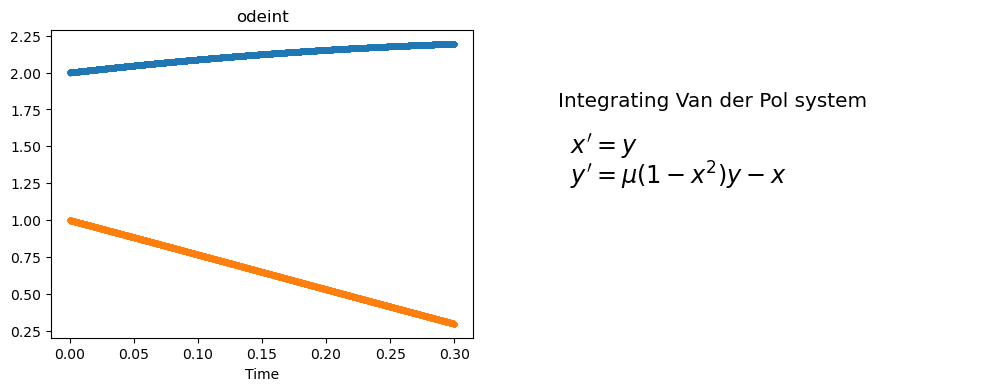

In [2]:
import numpy as np
from scipy.integrate import odeint

r = 0.1
def f(y,t):
    return [y[1], r*(1 - y[0]*y[0])*y[1] - y[0]]

# initial value
y0 = [2.0, 1.]

n = 10000
T = 3.0*r
h = T/n
# print h
ts = np.arange(0.0001,T, h)
ys = odeint(f, y0, ts)
   
fig = plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.plot(ts, ys[:, :], '.-')  
plt.xlabel('Time')
plt.title('odeint')

ax = fig.add_subplot(122)
ax.set_axis_off()
ax.text(0, .5, "$\;\; y' = \mu (1-x^2)y - x$ ", size="xx-large");
ax.text(0, .6, "$\;\; x' = y$", size="xx-large");
ax.text(0, .75, "Integrating Van der Pol system", size="x-large");

plt.show()




* Integrating lorenz system using ode(*) in scipy
* The lorenz system describing the atmospheric convection: chaotic but resembles a beautiful butterfly 




C:\Users\22718\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


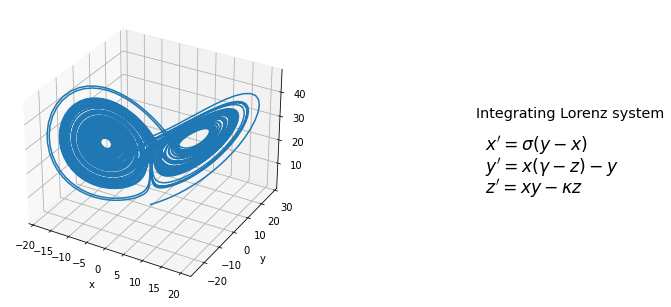

In [3]:
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def lorenz_sys(t, q):
    x = q[0]
    y = q[1]
    z = q[2]
    # sigma, rho and beta are global.
    f = [sigma * (y - x),
         rho*x - y - x*z,
         x*y - beta*z]
    return f


#ic = [1.0, 2.0, 1.0]
ic = [0.01, 0.01, 0.01]
t0 = 0.0
t1 = 70.0
dt = 0.01

sigma = 10.0
rho = 28.0
beta = 8.0/3.0

#sigma = 28.0
#rho = 46.92
#beta = 4.0

solver = ode(lorenz_sys)

t = []
sol = []
solver.set_initial_value(ic, t0)
#solver.set_integrator('dop853')
solver.set_integrator('dopri5')

while solver.successful() and solver.t < t1:
    solver.integrate(solver.t + dt)
    t.append(solver.t)
    sol.append(solver.y)

t = np.array(t)
sol = np.array(sol)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(sol[:,0], sol[:,1], sol[:,2])
plt.xlabel('x')
plt.ylabel('y')

ax = fig.add_subplot(122)
ax.set_axis_off()
ax.text(2, .3, "$\;\; z' = x y -\kappa z$", size="xx-large");
ax.text(2, .4, "$\;\; y' = x ( \gamma - z ) - y $", size="xx-large");
ax.text(2, .5, "$\;\; x' = \sigma (y - x) $", size="xx-large");
ax.text(2, .65, "Integrating Lorenz system", size="x-large");

plt.show()


# Introduction to PDE in Finance

* In finance, most partial differential equations (PDE) we encounter are of the second order (the highest derivative)

$$
\renewcommand{PDut}{\frac{\partial u}{\partial t}}
\renewcommand{PDux}{\frac{\partial u}{\partial x}}
\renewcommand{PDutt}{\frac{\partial ^2u}{\partial t^2}}
\renewcommand{PDuxx}{\frac{\partial ^2u}{\partial x^2}}
\renewcommand{PDuyy}{\frac{\partial ^2u}{\partial y^2}}
a(x,t)\PDutt + 2b(x,t)\frac{\partial ^2u}{\partial t\partial x} + c(x,t)\PDuxx +  d(x,t)\PDut + e(x,t)\PDux = f(t,x,u)
$$

* It can be classified into three categories: **Hyperbolic, Parabolic and Elliptic**

* In general, the different types of equations make a big difference in how the solutions behave and

* on how we can solve them more effectively



## Classification

### Hyperbolic 

* $b^2(x,t) - a(x,t)c(x,t) > 0 $
     $\;$

* The canonical form:
$$
\large{
\PDutt = c^2 \PDuxx
}
$$

* No steady state and no diffusion, mostly referred to as the **Wave equation** or **Advection equation**

### Parabolic 


* $b^2(x,t) - a(x,t)c(x,t) = 0 $
     $\;$

* The canonical form:
$$
\large{
\PDut = d \;\PDuxx
}
$$


* Evolving to a steady state due to diffusion, referred to as the **Heat equation**

### Elliptic 


* $b^2(x,y) - a(x,y)c(x,y) < 0 $
     $\;$

* The canonical form:
$$
\large{
\PDuxx + \PDuyy = f(x,y)
}
$$


* Steady state (time independent), mostly referred to as the **Laplace** ($f(x,y) = 0$) or **Poisson** equation.

# Feyman Kac Theorem


Let's consider an SDE of the form
$$ dX_t = \mu(t,X_t) dt + \sigma(t,X_t) dW_t $$

and the function $u(t,X_t) = E_t(g(X_T))$ for some (nice) Borelian function $g$. Then the function $u(t,x)$, under suitable conditions satisfies

$$ \PDut + \mu(t,x) \PDux + \frac{1}{2} \sigma^2(t,x) \PDuxx = 0 $$



If instead we consider the function $u(t,X_t) =E_t\left(g(X_T)e^{-\int_t^T r_u du}\right) $ then 
$$M_t = u(t,X_t) e^{-\int_0^t r_u du} = E_t(g(X_T) e^{\int_0^T r_u du})  $$

is a (local) martingale and should therefore be driftless, and from
$$ dM_t = (du(t, X_t) - r_t u(t,X_t)) e^{-\int_0^t r_u du} $$

one gets
$$ \PDut + \mu(t,x) \PDux + \frac{1}{2} \sigma^2(t,x) \PDuxx = r_t u(t,x) $$

**Note** that if $r_t = r(t)$ is a deterministic function, then the above equation yields a PDE. Same if $r$ is $r(t,X_t)$.



Let's define $u(t,X_t) = E_t(\int_t^T a_u du)$, then intuitively

\begin{split}
u(t, X_t) &= E_t\left(\int_t^{t+h} a_u du + E_{t+h}\left( \int_{t+h}^T a_u du \right)\right) \\
&= a_t dt + o(dt) +  E_t\left( u(t+h, X_{t+h})\right)\\ 
 \Rightarrow E_t\left( u(t+h, X_{t+h}) - u(t, X_t)\right) &= -a_t dt + o(dt)
\end{split}

i.e., the drift of $u(t,X_t)$ should be $-a_t dt$.

More formaly, consider the martingale 
$$M_t = E_t\left( \int_0^T a_u du \right) = \int_0^t a_u du + u(t,X_t)$$

then $dM_t = a_tdt + du(t,X_t)$. Ito's formula and having the drift equal to zero yields
$$ \PDut + \mu(t,x) \PDux + \frac{1}{2} \sigma^2(t,x) \PDuxx + a_t = 0 $$


**Note** that like precedently, if $a_t = a(t,X_t)$, then the above equation yields a PDE.



**Exercise:** Repeat the above approach to find the PDE (with its terminal condition) of 
$$ u(t,X_t) = E_t\left(g(X_T) e^{-\int_t^T r_u du} + \int_t^T e^{-\int_t^{u} r_s ds} a(u,X_u) du\right)$$

## Pricing PDEs in Finance

We consider the simple case of a local volatility model with deterministic rates (extensions to this framework are straightforward), namely

$$ \frac{dS_t}{S_t} = (r-q)dt + \sigma(t,S_t) dW_t $$

Basic framework in EQD or FX derivatives. Rates and dividend yields can be chosen to be deterministic function of time.


## **Black-Scholes** Equation

$$
\renewcommand{PDuS}{\frac{\partial u}{\partial S}}
\renewcommand{PDuSS}{\frac{\partial ^2u}{\partial S^2}}
\PDut + rS\PDuS + \frac{1}{2}\sigma^2(t,S)S^2\PDuSS - ru = 0
$$

* It belongs to the parabolic type, and can be converted into the standard Heat equation form by a change-of-variables

* For **European Call** option, the "initial" (the payoff function) and boundary conditions are

\begin{aligned}
&u(S,T) = \max(S-K, 0);
\\
&u(0,t) = 0; 
\\
&u(S,t) \sim S - Ke^{-r(T-t)}, \;\mbox{as } \; S \rightarrow \infty
\end{aligned}

* For **European Put** option, the "initial" (the payoff function) and boundary conditions are

\begin{aligned}
\renewcommand{FDut}{\frac{u_{i,k+1}-u_{i,k}}{\triangle t}}
\renewcommand{FDutb}{\frac{u_{i,k}-u_{i,k-1}}{\triangle t}}
\renewcommand{FDutc}{\frac{u_{i,k+1}-u_{i,k-1}}{2\triangle t}}
\renewcommand{FDutt}{\frac{u_{i,k+1}-2u_{i,k}+u_{i,k-1}}{\triangle t^2}}
\renewcommand{FDux}{\frac{u_{i+1,k}-u_{i,k}}{\triangle x}}
\renewcommand{FDuxb}{\frac{u_{i,k}-u_{i-1,k}}{\triangle x}}
\renewcommand{FDuxc}{\frac{u_{i+1,k}-u_{i-1,k}}{2\triangle x}}
\renewcommand{FDuxx}{\frac{u_{i+1,k}-2u_{i,k}+u_{i-1,k}}{\triangle x^2}}
&u(S,T) = \max(K-S, 0);
\\
&u(0,t) = Ke^{-r(T-t)}; 
\\
&u(S,t) = 0, \;\mbox{as } \; S \rightarrow \infty
\end{aligned}

## American Options

For a payoff $g(x)$, the PDE of an American option is given by:

$$  \max \left(\PDut + rS\PDuS + \frac{1}{2}\sigma^2(t,S)S^2\PDuSS - ru, g(x) - u \right) = 0 $$




## Barrier Options

Let us consider an Up-And-Out option with strike $K < B$. Noting $\tau_B = \inf(t>0, S_t \geq B)$, the price has the form
$$ u(t,S_t) 1_{\{ t < \tau_B \}} = 1_{\{ t < \tau_B \}} E_t\left( g(S_{\tau_b \wedge T}) e^{-r \tau_b \wedge T} \right) $$

If $S \geq B$, then $u(t,S) = 0$. Otherwise, it would follow the usual pricing PDE.

The additional boundary condition becomes $u(t,B) = 0$.

## Asian Options

The payoff has the form
$$ g\left(S_T, \frac{1}{T} \int_0^T S_t dt \right) $$

From there, we have two possible approaches.

One can define $A_t = \frac{1}{T} \int_0^t S_u du$, in which case $A_0 = 0$ and the price function as a function $u(t,X_t, A_t)$ follows the PDE
$$ \PDut + r S \PDuS + \frac{1}{2} S^2 \sigma^2(t,S) \PDuSS + \frac{S}{T} \frac{\partial u}{\partial A} = ru$$

Or, one can define $A_t = \frac{1}{t} \int_0^t S_u du$, in which case $A_0 = S_0$ but then 
$$ \PDut + r S \PDuS + \frac{1}{2} S^2 \sigma^2(t,S) \PDuSS + \frac{S-A}{t} \frac{\partial u}{\partial A} = ru$$

Note the singularity as $t \to 0$ when $S \neq A$ in the PDE operator.


And the terminal condition has the form $u(T,s,a) = g(s,a)$ or $u(T,s,a) = g(s,a/T)$ depending on the convention choice.


## Lookback Options
$$ g\left(S_T, M_T \right) $$

where $M_T = \sup_{0\leq u \leq T} S_u$.

Here again, the pair $(S_t, M_t)$ is Markovian. Intuitively $dM_t = 1_{\{ S_t = M_t \}} (dS_t)^+$, but this needs to be interpreted in the sense of (random) measure for $dM_t$.

The pricing function becomes $u(t,S,M) = E_t(g(S_T, M_T)e^{-r(T-t)}) = E(g(S_T, M_T) | S_t = S, M_t = M)$ and the pricing PDE is 
$$ \frac{\partial u}{\partial t}(t,S,M) + rS \frac{\partial u}{\partial S}(t,s,M) + \frac{1}{2} S^2 \sigma^2(t,S) \frac{\partial^2  u}{\partial S ^2}(t,S,M) = r u(t,x,M) $$

with the boundary conditions
$$ u(t,0, M) = e^{-r(T-t)}g(0,M) \;,\;\; 0\leq t \leq T \;, \;\; M \geq 0 $$

$$ \partial_m u(t,S,m)|_{S=m} = 0 \;,\;\; 0\leq t \leq T \;, \;\; M > 0 $$

$$ u(T,S,m) = g(S,m) \;\; S \leq 0 \leq S \leq M $$

# Finite Difference Methods for Solving PDEs


* Very rare that the PDEs have closed form solutions, in general, can only be solved numerically.


* Will focus on the finite difference method (FDM): other numerical methods exist and can be more appropriate---very much depends on the actual problems at hand.

* Schemes involves tridiagonal matrices and solving for $Ax =b$ for $A$ trigionaly, which can be done with the efficient [Thomas algorithm](https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm).


/## Discretization


* First step in solving PDEs using FDM is to represent the solution $u(x,t)$ as a discrete collection of values at a well distributed grid points in space and time in the proper domain.


* For example, for the  rectangular domain in space and time with $t \in [0, T]$ and $x\in [x_{min}, x_{max}]$, we can represent the points simply as 

$$t_0 = 0, t_1, t_2, \cdots, t_M = T$$

in time and 

$$x_0 = x_{min}, x_1, x_2, \cdots, x_N = x_{max}$$

in space. The grid is uniform, i.e. $t_{k+1} = t_k + \triangle t, \;\triangle t = \frac{T}{M}$ and $x_{i+1} = x_i + \triangle x, \;\triangle x = \frac{x_{max}-x_{min}}{N}$.


* The discretized version of the solution will be represented by the values of

$$
u_{i,k} = u(x_i, t_k), \;\mbox{for   }  i = 0,1,\cdots,N, \mbox{  and  } k = 0,1,\cdots,M
$$


* The values of $u(x,t)$ at any other desired points can be approximated via interpolation.


* A uniform mesh may not necessary be the most efficient form to work with, in fact, it rarely is.


* A greatly simplified rule-of-thumb: the mesh needs to be refined around the region where the function varies a lot


* On the other hand, the mesh can be relatively coarse if the function is smooth and changing slowly


* In finance, the time grid is well advised to keep the **important** dates as grid points: such as cash flow dates, contractual schedule dates, etc. The spacing of these dates is most likely not uniform.



## Finite Difference Methods(FDM)

* Toolkit for finite difference approximation

|  Partial Derivative | Finite Difference | Type | Order | 
| :------: | :-----: | :-----: | :-----: | 
|  $\PDux$ | $\FDux$ | forward | 1st in $x$ | 
|  $\PDux$ | $\FDuxb$ | backward | 1st in $x$ | 
|  $\PDux$ | $\FDuxc$ | central | 2nd in $x$ | 
|  $\PDuxx$ | $\FDuxx$ | symmetric | 2nd in $x$ |  
|  $\PDut$ | $\FDut$ | forward | 1st in $t$ | 
|  $\PDut$ | $\FDutb$ | backward | 1st in $t$ | 
|  $\PDut$ | $\FDutc$ | central | 2nd in $t$ | 
|  $\PDutt$ | $\FDutt$ | symmetric | 2nd in $t$ | 


## The Explicit Method 

* For convenience, reverse the time for Black-Scholes notation: $ t \leftarrow T - t$

$$
\small
\PDut - \frac{1}{2}\sigma^2S^2\PDuSS - rS\PDuS + ru = 0
$$

* Approximate the Black-Scholes Eqn by

$$
\small
\FDut - \frac{1}{2} \sigma^2 x_i^2 \FDuxx - r x_i \FDuxc + r u_{i,k} = 0
$$

* This can be rewritten simply as

\begin{aligned}
\small
u_{i,k+1} & = \left\{ \frac{1}{2}\sigma^2 x_i^2 \frac{\triangle t}{\triangle x^2} - r x_i \frac{\triangle t}{2\triangle x} \right\} u_{i-1,k}
\\
& + \left\{ 1 - \sigma^2 x_i^2 \frac{\triangle t}{\triangle x^2}  -r \triangle t \right\} u_{i,k}
\\
& + \left\{ \frac{1}{2}\sigma^2 x_i^2 \frac{\triangle t}{\triangle x^2} + r x_i \frac{\triangle t}{2\triangle x} \right\} u_{i+1,k}
\end{aligned}

**Exercise**: Noting $u_k = (u_{1,k}, u_{2,k},...,u_{M,k})^T$, find the matrix $A$ such that $u_{k+1} = A u_k$.

## Consistency, Stability and Convergence

* For any FDM that are used to solve practical problems, we should ask

    * 1) How accurate is the method?    
    
    * 2) Does it converge?    
    
    * 3) What is the best choice of step sizes?




### Consistency 

* For the explicit method above, the local truncation error is

$$
T(x,t) = O(\triangle x^2 + \triangle t)
$$



* Taylor series expansion can verify this (or one can simply read this off of the Toolkit Table).


* So the explicit method above is consistent of order 1 in time and order 2 in spatial variable.




* The stability condition for the explicit scheme is:

$$
\triangle t < \frac{\triangle x^2}{ \sigma^2 x_{max}^2 }
$$

* This is the CFL condition for the explicit method, which says, in order for the explicit method to be stable, the time step size needs to be really small.

### Lax Theorem: Consistency + Stability = Convergence


* The **Lax equivalence theorem** holds for PDE as well.

## The Implicit Method 

* Approximate the Black-Scholes Eqn by

$$
\small
\FDutb - \frac{1}{2} \sigma^2 x_i^2 \FDuxx - r x_i \FDuxc = - r u_{i,k}
$$

* Which can be rewritten as

\begin{aligned}
\small
u_{i,k-1} & = \left\{ -\frac{1}{2}\sigma^2 x_i^2 \frac{\triangle t}{\triangle x^2} + r x_i \frac{\triangle t}{2\triangle x} \right\} u_{i-1,k}
\\
& + \left\{ 1 + \sigma^2 x_i^2 \frac{\triangle t}{\triangle x^2}  + r \triangle t \right\} u_{i,k}
\\
& + \left\{ -\frac{1}{2}\sigma^2 x_i^2 \frac{\triangle t}{\triangle x^2} - r x_i \frac{\triangle t}{2\triangle x} \right\} u_{i+1,k}
\end{aligned}



* The local truncation error

$$
T(x,t) = O(\triangle x^2 + \triangle t)
$$


* The implicit method is unconditionally stable.


## The Crank-Nicholson Method 

* Crank-Nicholson is an average of the explicit and implicit scheme:

\begin{aligned}
\small
\FDut & = \frac{1}{4}  \sigma^2 x_i^2 \left\{ \FDuxx + \frac{u_{i+1,k+1}-2u_{i,k+1}+u_{i-1,k+1}}{\triangle x^2} \right\}
\\ 
    & + \frac{1}{2} r x_i \left\{ \FDuxc + \frac{u_{i+1,k+1}-u_{i-1,k+1}}{2\triangle x} \right\} 
\\
    & - \frac{1}{2} r \left\{  u_{i,k} +  u_{i,k+1} \right\} 
\end{aligned}


* The local truncation error is (Note: expanding the Taylor series at $(i, k+\frac{1}{2})$)

$$
T(x,t) = O(\triangle x^2 + \triangle t^2)
$$

* Unconditionally stable

# Numerical Examples 

* Black Scholes formulae and FDM methods for vanilla European call and up-and-out Barrier Call.


## Vanilla European Option:
* Strike = 100
* Risk Free Rate = 5%
* Constant Volatility = 35%
* Option Maturity = 1 year
* Option Type = Call

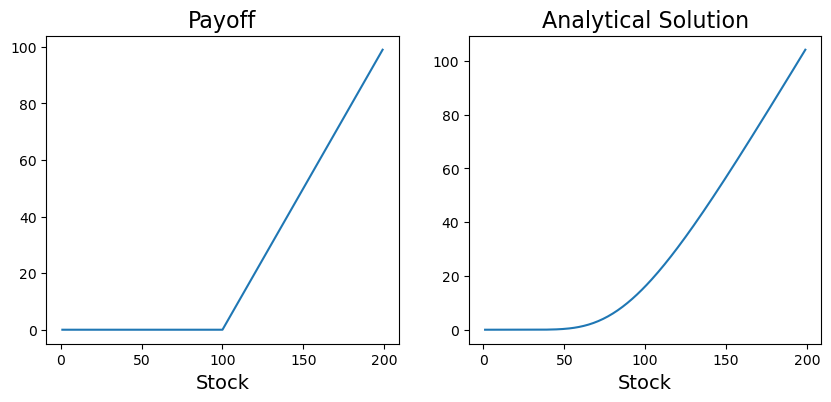

In [4]:
import numpy as np
from scipy.stats import norm
import time 

#Black and Scholes
def BlackScholesFormula(type, S0, K, r, sigma, T):
    dtmp1 = np.log(S0 / K)
    dtmp2 = 1.0/(sigma * np.sqrt(T))
    sigsq = 0.5 * sigma * sigma
    d1 =  dtmp2 * (dtmp1 + T * (r + sigsq))
    d2 =  dtmp2 * (dtmp1 + T * (r - sigsq))
    if type=="C":
        return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * stats.cdf(-d2) - S0 * norm.cdf(-d1)

K = 100.0
r = 0.05
sigma = 0.35
T = 1
putCall ='C'

Smin = 0.0
Smax = 200.0
ns = 201
Ss = np.linspace(Smin, Smax, ns, endpoint=True)
Ss = Ss[1:-1]
#print Ss

t=time.time()
px = BlackScholesFormula(putCall, Ss, K, r, sigma, T)
elapsed=time.time()-t
#print(px)
#print("Elapsed Time:", elapsed)
#idx = 200-1
#print Ss[idx]
#print px[idx]

payoff = np.clip(Ss-K, 0.0, 1e50)
#print "payoff = ", payoff

plt.figure(figsize=[10, 4])
plt.subplot(1, 2, 1)
plt.plot(Ss, payoff)
plt.xlabel('Stock', fontsize=14);
plt.title('Payoff' , fontsize=16);

plt.subplot(1, 2, 2)
plt.plot(Ss, px)
plt.xlabel('Stock', fontsize=14);
plt.title('Analytical Solution' , fontsize=16);

## Discretization parameters and results for the forward scheme

In [10]:
from scipy import sparse
import scipy.sparse.linalg.dsolve as linsolve

class BS_FDM_explicit:
    def __init__(self, 
               r, 
               sigma, 
               maturity, 
               Smin, 
               Smax, 
               Fl, 
               Fu, 
               payoff, 
               nt, 
               ns):
        self.r  = r 
        self.sigma = sigma 
        self.maturity  = maturity

        self.Smin = Smin     
        self.Smax = Smax
        self.Fl = Fl        
        self.Fu = Fu

        self.nt  = nt
        self.ns  = ns

        self.dt = float(maturity)/nt
        self.dx = float(Smax-Smin)/(ns+1)
        self.xs = Smin/self.dx

        self.u = np.empty((nt + 1, ns))
        self.u[0,:] = payoff

        ## Building Coefficient matrix:        
        A = sparse.lil_matrix((self.ns, self.ns))

        for j in range(0, self.ns):
            xd = j + 1 + self.xs
            sx = self.sigma * xd
            sxsq = sx * sx

            dtmp1 = self.dt * sxsq
            dtmp2 = self.dt * self.r
            A[j,j] = 1.0 - dtmp1 - dtmp2
            dtmp1 = 0.5 * dtmp1
            dtmp2 = 0.5 * dtmp2 * xd
            if j > 0:
                A[j,j-1] = dtmp1 - dtmp2
            if j < self.ns - 1:
                A[j,j+1] = dtmp1 + dtmp2

        self.A = A.tocsr()

        ### Building bc_coef:
        nxl = 1 + self.xs
        sxl = self.sigma * nxl
        nxu = self.ns + self.xs
        sxu = self.sigma * nxu

        self.blcoef = 0.5 * self.dt * (sxl * sxl - self.r * nxl)
        self.bucoef = 0.5 * self.dt * (sxu * sxu + self.r * nxu)

    def solve(self):
        for i in range(0, self.nt):
            self.u[i+1,:]          = self.A * self.u[i,:]
            self.u[i+1,0]         += self.blcoef * self.Fl[i]
            self.u[i+1,self.ns-1] += self.bucoef * self.Fu[i]

        return self.u

dx = (Smax - Smin)/(ns-1)
print("Smin = ", Smin)
print("Smax = ", Smax)
print("ns =", ns)
print("dx =", dx)
print("sigma =", sigma)
dt_max = dx*dx/(sigma*sigma*Smax*Smax)
print("by CFL, dt <", "%.4f"%dt_max)
mt_min = int(T/dt_max)+1
print("which requires in time domain the number of steps ~= ", mt_min)

Smin =  0.0
Smax =  200.0
ns = 201
dx = 1.0
sigma = 0.35
by CFL, dt < 0.0002
which requires in time domain the number of steps ~=  4900


Elapsed Time1: 0.12582921981811523
Elapsed Time2: 0.12583327293395996
Elapsed Time3: 0.17226576805114746


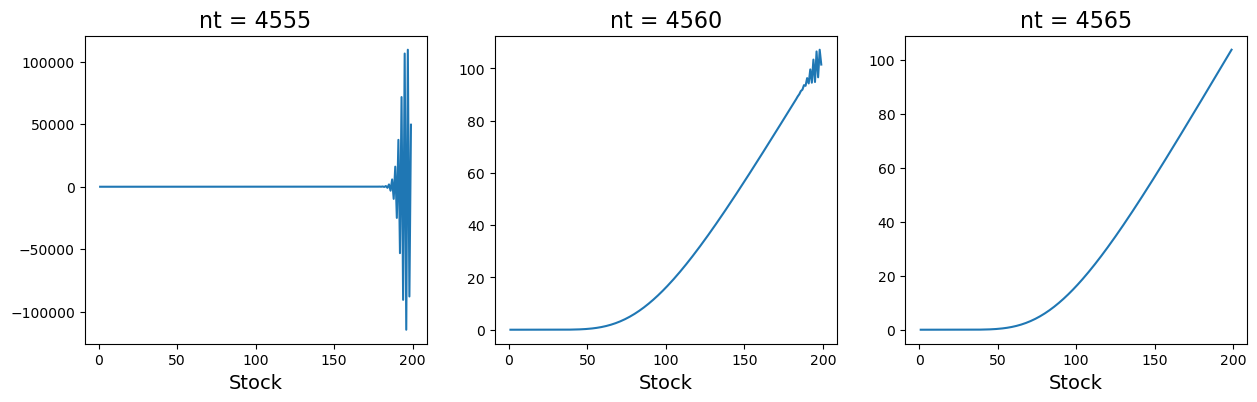

In [11]:
n = ns-2
X = np.linspace(0.0, Smax, n+2)
X = X[1:-1]

payoff = np.clip(X-K, 0.0, 1e50)
#print "payoff = ", payoff
  
m = 4555 
Fl = np.zeros((m+1,))
Fu = Smax - K*np.exp(-r * np.linspace(0.0, T, m+1))
    
t = time.time()
bs1 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs1.solve()
elapsed=time.time()-t
print("Elapsed Time1:", elapsed)

##print  px_fd_mat.shape
nrow = len(px_fd_mat[:,1])
#print(px_fd_mat[nrow-1,:])

plt.figure(figsize=[15, 4]);
plt.subplot(1, 3, 1)
plt.plot(X, px_fd_mat[nrow-1,:])
plt.xlabel('Stock', fontsize=14);
plt.title('nt = %.f'%m, fontsize=16);

m = 4560
Fl = np.zeros((m+1,))
Fu = Smax - K*np.exp(-r * np.linspace(0.0, T, m+1))

t = time.time()
bs2 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs2.solve()
elapsed=time.time()-t
print("Elapsed Time2:", elapsed)

plt.subplot(1, 3, 2)
nrow = len(px_fd_mat[:,1])
plt.plot(X, px_fd_mat[nrow-1,:])
plt.xlabel('Stock', fontsize=14);
plt.title('nt = %.f'%m, fontsize=16);

m = 4565
Fl = np.zeros((m+1,))
Fu = Smax - K*np.exp(-r * np.linspace(0.0, T, m+1))
    
t = time.time()
bs3 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs3.solve()
elapsed=time.time()-t
print("Elapsed Time3:", elapsed)

plt.subplot(1, 3, 3)
nrow = len(px_fd_mat[:,1])
plt.plot(X, px_fd_mat[nrow-1,:])
plt.xlabel('Stock', fontsize=14);
plt.title('nt = %.f' % m, fontsize=16);

## Now look at the behavior of the implicit scheme

In [16]:
from scipy import sparse
import scipy.sparse.linalg.dsolve as linsolve

class BS_FDM_implicit:
    def __init__(self, 
               r, 
               sigma, 
               maturity, 
               Smin, 
               Smax, 
               Fl, 
               Fu, 
               payoff, 
               nt, 
               ns):
        self.r  = r 
        self.sigma = sigma 
        self.maturity  = maturity

        self.Smin = Smin     
        self.Smax = Smax
        self.Fl = Fl        
        self.Fu = Fu

        self.nt  = nt
        self.ns  = ns

        self.dt = float(maturity)/nt
        self.dx = float(Smax-Smin)/(ns+1)
        self.xs = Smin/self.dx

        self.u = np.empty((nt + 1, ns))
        self.u[0,:] = payoff

        ## Building Coefficient matrix:        
        A = sparse.lil_matrix((self.ns, self.ns))

        for j in range(0, self.ns):
            xd = j + 1 + self.xs
            sx = self.sigma * xd
            sxsq = sx * sx

            dtmp1 = self.dt * sxsq
            dtmp2 = self.dt * self.r
            A[j,j] = 1.0 + dtmp1 + dtmp2

            dtmp1 = -0.5 * dtmp1
            dtmp2 = -0.5 * dtmp2 * xd
            if j > 0:
                A[j,j-1] = dtmp1 - dtmp2
            if j < self.ns - 1:
                A[j,j+1] = dtmp1 + dtmp2

        self.A = linsolve.splu(A)
        self.rhs = np.empty((self.ns, ))

        ### Building bc_coef:
        nxl = 1 + self.xs
        sxl = self.sigma * nxl
        nxu = self.ns + self.xs
        sxu = self.sigma * nxu

        self.blcoef = 0.5 * self.dt * (- sxl * sxl + self.r * nxl)
        self.bucoef = 0.5 * self.dt * (- sxu * sxu - self.r * nxu)    

    def solve(self):
        for i in range(0, self.nt):
            self.rhs[:] = self.u[i,:]
            self.rhs[0]         -= self.blcoef * self.Fl[i]
            self.rhs[self.ns-1] -= self.bucoef * self.Fu[i]
            self.u[i+1,:] = self.A.solve(self.rhs)

        return self.u


C:\Users\msont\AppData\Local\Temp\ipykernel_11972\293456213.py:54: DeprecationWarning: Please use `splu` from the `scipy.sparse.linalg` namespace, the `scipy.sparse.linalg.eigen` namespace is deprecated.
  self.A = linsolve.splu(A)
C:\Users\msont\anaconda3\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


Elapsed Time1: 0.17183637619018555
Elapsed Time2: 0.041620492935180664
Elapsed Time3: 0.01613759994506836


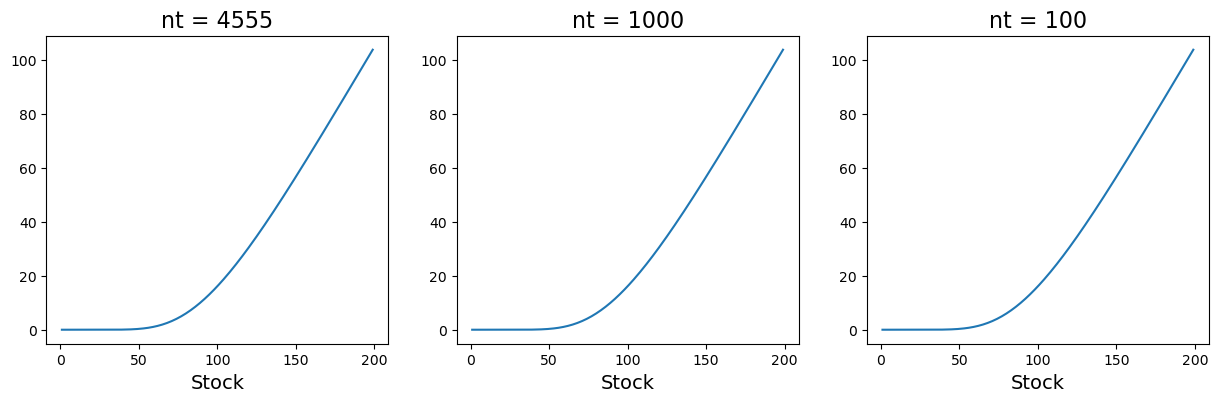

In [17]:
Smax = 200
n = ns-2
X = np.linspace(0.0, Smax, n+2)
X = X[1:-1]

payoff = np.clip(X-K, 0.0, 1e600)
  
m = 4555 
Fl = np.zeros((m+1,))
Fu = Smax - K*np.exp(-r * np.linspace(0.0, T, m+1))
    
t = time.time()
bs1 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs1.solve()
elapsed=time.time()-t
print("Elapsed Time1:", elapsed)

#print  px_fd_mat.shape

plt.figure(figsize=[15, 4]);
plt.subplot(1, 3, 1)
nrow = len(px_fd_mat[:,1])
plt.plot(X, px_fd_mat[nrow-1,:])
plt.xlabel('Stock', fontsize=14);
plt.title('nt = %.f'%m,  fontsize=16);

m = 1000
Fl = np.zeros((m+1,))
Fu = Smax - K*np.exp(-r * np.linspace(0.0, T, m+1))

t = time.time()
bs2 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs2.solve()
elapsed=time.time()-t
print("Elapsed Time2:", elapsed)

plt.subplot(1, 3, 2)
nrow = len(px_fd_mat[:,1])
plt.plot(X, px_fd_mat[nrow-1,:])
plt.xlabel('Stock', fontsize=14);
plt.title('nt = %.f'%m, fontsize=16);

m = 100
Fl = np.zeros((m+1,))
Fu = Smax - K*np.exp(-r * np.linspace(0.0, T, m+1))
    
t = time.time()
bs3 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs3.solve()
elapsed=time.time()-t
print("Elapsed Time3:", elapsed)

plt.subplot(1, 3, 3)
nrow = len(px_fd_mat[:,1])
plt.plot(X, px_fd_mat[nrow-1,:])
plt.xlabel('Stock', fontsize=14);
plt.title('nt = %.f'%m, fontsize=16);
